# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [3]:
print(net)
print(X,y)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]] [0 1 2 2 1]


# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [5]:
net.loss(X, y, reg=0.05)

(1.3037878913298202,
 {'W1': array([[-9.68499043e-02,  4.00157208e-03, -2.05517828e-01,
           1.87986352e-01,  1.60531645e-01, -9.77277880e-03,
           9.50088418e-03,  2.68884345e-03, -3.01022811e-02,
          -5.67802801e-03],
         [ 4.45595008e-02,  1.45427351e-02,  6.95515502e-01,
          -2.88616327e-01, -2.66986989e-01,  3.33674327e-03,
           1.49407907e-02,  1.93435586e-02, -6.54700997e-02,
          -5.32928651e-01],
         [ 1.16977821e-02,  6.53618595e-03, -2.31623550e-01,
          -6.26390355e-02, -1.41638971e-03, -1.45436567e-02,
           4.57585173e-04, -2.90067077e-03,  5.35668029e-01,
           3.69731998e-01],
         [ 7.71766403e-02,  3.78162520e-03, -3.13778323e-01,
           2.26868568e-01,  2.06678709e-01,  1.56348969e-03,
           1.23029068e-02, -2.18055786e-03, -6.78943040e-01,
           9.85573015e-02]]),
  'b1': array([-0.0070484 ,  0.        ,  0.00310494, -0.0072399 , -0.00573377,
          0.        ,  0.        , -0.0024372 ,

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.014753309208397685


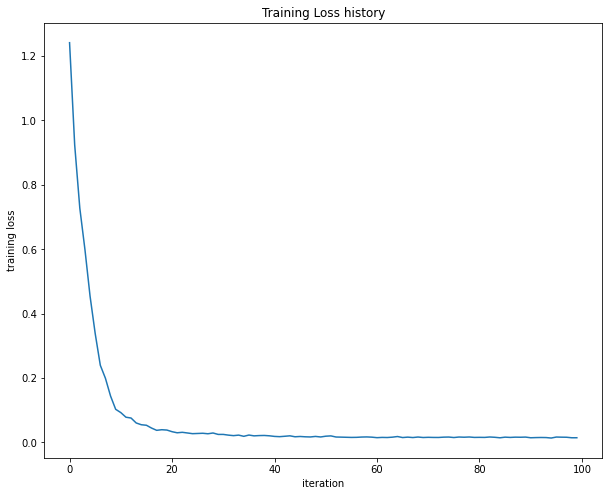

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [9]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 3000: loss 2.302978
iteration 100 / 3000: loss 2.302529
iteration 200 / 3000: loss 2.298005
iteration 300 / 3000: loss 2.250354
iteration 400 / 3000: loss 2.190563
iteration 500 / 3000: loss 2.135922
iteration 600 / 3000: loss 2.050965
iteration 700 / 3000: loss 2.010513
iteration 800 / 3000: loss 2.049566
iteration 900 / 3000: loss 1.968290
iteration 1000 / 3000: loss 2.044790
iteration 1100 / 3000: loss 1.982159
iteration 1200 / 3000: loss 1.970405
iteration 1300 / 3000: loss 1.886950
iteration 1400 / 3000: loss 1.928462
iteration 1500 / 3000: loss 1.843314
iteration 1600 / 3000: loss 1.757890
iteration 1700 / 3000: loss 1.757460
iteration 1800 / 3000: loss 1.882280
iteration 1900 / 3000: loss 1.941955
iteration 2000 / 3000: loss 1.848749
iteration 2100 / 3000: loss 1.748817
iteration 2200 / 3000: loss 1.887877
iteration 2300 / 3000: loss 1.787787
iteration 2400 / 3000: loss 1.809084
iteration 2500 / 3000: loss 1.856677
iteration 2600 / 3000: loss 1.781385
iteration 270

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

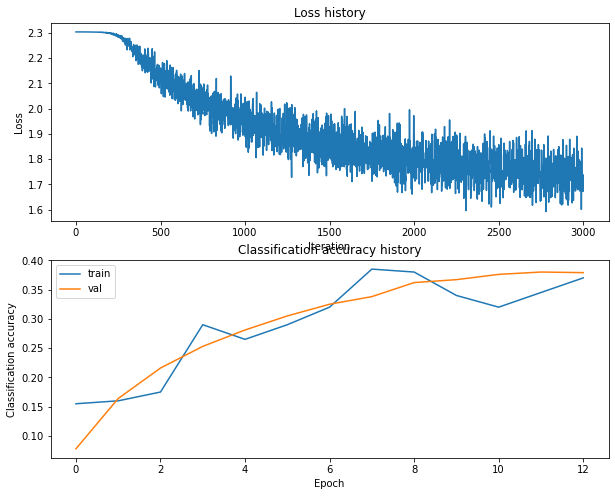

In [13]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [14]:
net.params['W2'].shape

(50, 10)

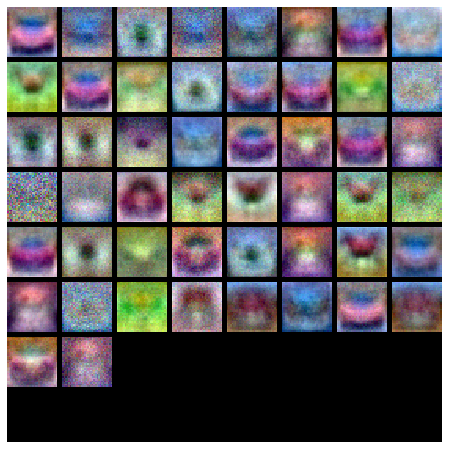

In [15]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [46]:
best_net = None # store the best model into this 
best_val = 0.0
best_hs = 100 # [100, 200, 300, 400, 500]
best_lr = 1e-3 # [1e-3, 5e-4, 1e-4]
best_lr_decay = 0.9 # [0.5, 0.6, 0.7, 0.8, 0.9]
best_bs = 200 # [10, 25, 50, 100, 200, 300]
best_lr_reg = 0.2 # [0.1, 0.2, 0.3, 0.4, 0.5]
best_stats = None

In [ ]:
# 定义range
lr_range = [1e-3, 5e-4, 1e-4]
hs_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bs_range = [25, 50, 100, 200, 300, 400]
lr_d_range = [0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
lr_reg_range = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [56]:
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

def plot_history(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Classification accuracy')
    plt.legend()
    plt.show()

    
import itertools
import time

input_size = 32 * 32 * 3
# h_s = 1000
num_classes = 10
# num_iters = 3000
# count = 0
# all_count = len(learning_rates) * len(hidden_sizes)
def fine_tune(title, lr, hs, lr_decay, lr_reg, bs, verbose=False):
    print(f'[{title}]', end=' ')
    num_train = X_train.shape[0]
    iterations_per_epoch = max(num_train / bs, 1)
    num_epoch = 10
    num_iters = int(iterations_per_epoch*num_epoch)
    net = TwoLayerNet(input_size, hs, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=num_iters, batch_size=bs,
                learning_rate=lr, learning_rate_decay=lr_decay,
                reg=lr_reg, verbose=verbose)
    train_acc = np.mean(y_train == net.predict(X_train))
    val_acc = np.mean(y_val == net.predict(X_val))
    print('lr %e, hs %d, lr_decay %f, lr_reg %f, num_iters %d, batch_size %d \ntrain_acc: %f\tval acc: %f'
         %(lr, hs, lr_decay, lr_reg, num_iters, bs, train_acc, val_acc))
    return val_acc, net, stats

# for (hs, lr) in itertools.product(hidden_sizes, learning_rates):
#     print('lr: %e hs: %e' % (lr, hs))
#     tic = time.time()
#     net = TwoLayerNet(input_size, hs, num_classes)
#     # 可调 lr, batch_size, num_iters, lr_decay, reg, hidden_size
#     stats = net.train(X_train, y_train, X_val, y_val,
#                 num_iters=num_iters, batch_size=200,
#                 learning_rate=lr, learning_rate_decay=0.95,
#                 reg=0.25, verbose=True)
#     plot_history(stats)
#     train_acc = np.mean(y_train == net.predict(X_train))
#     val_acc = np.mean(y_val == net.predict(X_val))
#     results[(lr, hs)] = (train_acc, val_acc)
#     if val_acc > best_val:
#         best_val = val_acc
#         best_net = net
#     count += 1
#     toc = time.time()
#     print('%d/%d done! %fs remains' % (count, all_count, (all_count - count) * (toc-tic)))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


In [62]:
# lr
for lr in [1e-3, 5e-4, 1e-4]:
    val_acc, net, stats = fine_tune('lr', lr, best_hs, best_lr_decay, best_lr_reg, best_bs)
    if val_acc > best_val:
        best_val = val_acc
        best_lr = lr
        best_net = net
        best_stats = stats

[lr] lr 1.000000e-03, hs 400, lr_decay 0.900000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.636796	val acc: 0.533000
[lr] lr 5.000000e-04, hs 400, lr_decay 0.900000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.588735	val acc: 0.520000
[lr] lr 1.000000e-04, hs 400, lr_decay 0.900000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.434816	val acc: 0.445000


In [63]:
# hs
for hs in [500, 600, 700, 800]:
    val_acc, net, stats = fine_tune('hs', best_lr, hs, best_lr_decay, best_lr_reg, best_bs, True)
    if val_acc > best_val:
        best_val = val_acc
        best_hs = hs
        best_net = net
        best_stats = stats

[hs] iteration 0 / 4900: loss 2.304908
iteration 100 / 4900: loss 2.029877
iteration 200 / 4900: loss 1.663336
iteration 300 / 4900: loss 1.570554
iteration 400 / 4900: loss 1.663960
iteration 500 / 4900: loss 1.575804
iteration 600 / 4900: loss 1.481141
iteration 700 / 4900: loss 1.506723
iteration 800 / 4900: loss 1.629933
iteration 900 / 4900: loss 1.479188
iteration 1000 / 4900: loss 1.641676
iteration 1100 / 4900: loss 1.546745
iteration 1200 / 4900: loss 1.629365
iteration 1300 / 4900: loss 1.497102
iteration 1400 / 4900: loss 1.535450
iteration 1500 / 4900: loss 1.497573
iteration 1600 / 4900: loss 1.352883
iteration 1700 / 4900: loss 1.364741
iteration 1800 / 4900: loss 1.211519
iteration 1900 / 4900: loss 1.598130
iteration 2000 / 4900: loss 1.372840
iteration 2100 / 4900: loss 1.233804
iteration 2200 / 4900: loss 1.484309
iteration 2300 / 4900: loss 1.307648
iteration 2400 / 4900: loss 1.299939
iteration 2500 / 4900: loss 1.628865
iteration 2600 / 4900: loss 1.448905
iteratio

In [64]:
# lr decay
for lr_decay in [0.8, 0.85, 0.9, 0.95]:
    val_acc, net, stats = fine_tune('lr_decay', best_lr, best_hs, lr_decay, best_lr_reg, best_bs)
    if val_acc > best_val:
        best_val = val_acc
        best_lr_decay = lr_decay
        best_net = net
        best_stats = stats

[lr_decay] lr 1.000000e-03, hs 500, lr_decay 0.800000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.614020	val acc: 0.546000
[lr_decay] lr 1.000000e-03, hs 500, lr_decay 0.850000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.630571	val acc: 0.543000
[lr_decay] lr 1.000000e-03, hs 500, lr_decay 0.900000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.640939	val acc: 0.547000
[lr_decay] lr 1.000000e-03, hs 500, lr_decay 0.950000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.621878	val acc: 0.520000


In [65]:
# lr_reg
for lr_reg in [0.1, 0.15, 0.25, 0.35, 0.45]:
    val_acc, net, stats = fine_tune('lr_reg', best_lr, best_hs, best_lr_decay, lr_reg, best_bs)
    if val_acc > best_val:
        best_val = val_acc
        best_lr_reg = lr_reg
        best_net = net
        best_stats = stats

[lr_reg] lr 1.000000e-03, hs 500, lr_decay 0.900000, lr_reg 0.100000, num_iters 4900, batch_size 100 
train_acc: 0.651980	val acc: 0.538000
[lr_reg] lr 1.000000e-03, hs 500, lr_decay 0.900000, lr_reg 0.150000, num_iters 4900, batch_size 100 
train_acc: 0.640939	val acc: 0.547000
[lr_reg] lr 1.000000e-03, hs 500, lr_decay 0.900000, lr_reg 0.250000, num_iters 4900, batch_size 100 
train_acc: 0.621898	val acc: 0.544000
[lr_reg] lr 1.000000e-03, hs 500, lr_decay 0.900000, lr_reg 0.350000, num_iters 4900, batch_size 100 
train_acc: 0.602449	val acc: 0.527000
[lr_reg] lr 1.000000e-03, hs 500, lr_decay 0.900000, lr_reg 0.450000, num_iters 4900, batch_size 100 
train_acc: 0.588837	val acc: 0.529000


In [57]:
# batch size
for bs in [10, 25, 50, 100, 200, 300]:
    val_acc, net, stats = fine_tune('batch size', best_lr, best_hs, best_lr_decay, best_lr_reg, bs, True)
    if val_acc > best_val:
        best_val = val_acc
        best_bs = bs
        best_net = net
        best_stats = stats

[batch size] iteration 0 / 49000: loss 2.303726
iteration 100 / 49000: loss 2.735681
iteration 200 / 49000: loss 2.366814
iteration 300 / 49000: loss 2.731192
iteration 400 / 49000: loss 2.335300
iteration 500 / 49000: loss 2.759039
iteration 600 / 49000: loss 2.511749
iteration 700 / 49000: loss 1.857048
iteration 800 / 49000: loss 2.096219
iteration 900 / 49000: loss 3.295215
iteration 1000 / 49000: loss 2.335842
iteration 1100 / 49000: loss 2.120274
iteration 1200 / 49000: loss 2.682116
iteration 1300 / 49000: loss 2.326090
iteration 1400 / 49000: loss 2.121493
iteration 1500 / 49000: loss 3.246977
iteration 1600 / 49000: loss 2.618497
iteration 1700 / 49000: loss 1.465629
iteration 1800 / 49000: loss 2.847676
iteration 1900 / 49000: loss 2.607800
iteration 2000 / 49000: loss 2.612996
iteration 2100 / 49000: loss 3.851250
iteration 2200 / 49000: loss 3.241970
iteration 2300 / 49000: loss 4.605982
iteration 2400 / 49000: loss 2.246197
iteration 2500 / 49000: loss 3.995156
iteration 2

iteration 21300 / 49000: loss 1.572991
iteration 21400 / 49000: loss 2.055174
iteration 21500 / 49000: loss 3.568711
iteration 21600 / 49000: loss 1.966807
iteration 21700 / 49000: loss 2.223206
iteration 21800 / 49000: loss 1.269496
iteration 21900 / 49000: loss 2.017273
iteration 22000 / 49000: loss 3.153520
iteration 22100 / 49000: loss 1.897426
iteration 22200 / 49000: loss 2.055836
iteration 22300 / 49000: loss 3.632506
iteration 22400 / 49000: loss 2.490152
iteration 22500 / 49000: loss 1.856256
iteration 22600 / 49000: loss 1.958327
iteration 22700 / 49000: loss 2.379371
iteration 22800 / 49000: loss 1.658541
iteration 22900 / 49000: loss 2.875664
iteration 23000 / 49000: loss 2.418708
iteration 23100 / 49000: loss 2.128334
iteration 23200 / 49000: loss 2.667251
iteration 23300 / 49000: loss 2.639305
iteration 23400 / 49000: loss 2.716326
iteration 23500 / 49000: loss 2.309524
iteration 23600 / 49000: loss 2.455668
iteration 23700 / 49000: loss 2.777087
iteration 23800 / 49000: 

iteration 42400 / 49000: loss 2.033376
iteration 42500 / 49000: loss 1.614297
iteration 42600 / 49000: loss 1.959575
iteration 42700 / 49000: loss 1.771357
iteration 42800 / 49000: loss 2.136900
iteration 42900 / 49000: loss 1.971988
iteration 43000 / 49000: loss 1.977907
iteration 43100 / 49000: loss 1.873550
iteration 43200 / 49000: loss 1.794739
iteration 43300 / 49000: loss 2.073256
iteration 43400 / 49000: loss 1.781025
iteration 43500 / 49000: loss 1.136246
iteration 43600 / 49000: loss 1.799504
iteration 43700 / 49000: loss 2.671695
iteration 43800 / 49000: loss 0.836888
iteration 43900 / 49000: loss 1.350754
iteration 44000 / 49000: loss 1.649906
iteration 44100 / 49000: loss 1.417344
iteration 44200 / 49000: loss 2.135020
iteration 44300 / 49000: loss 2.320859
iteration 44400 / 49000: loss 0.976622
iteration 44500 / 49000: loss 1.463890
iteration 44600 / 49000: loss 1.270773
iteration 44700 / 49000: loss 1.170747
iteration 44800 / 49000: loss 1.507453
iteration 44900 / 49000: 

iteration 14400 / 19600: loss 1.519915
iteration 14500 / 19600: loss 1.440184
iteration 14600 / 19600: loss 1.052851
iteration 14700 / 19600: loss 1.325076
iteration 14800 / 19600: loss 1.634519
iteration 14900 / 19600: loss 1.266746
iteration 15000 / 19600: loss 1.495351
iteration 15100 / 19600: loss 1.736967
iteration 15200 / 19600: loss 1.293269
iteration 15300 / 19600: loss 1.432258
iteration 15400 / 19600: loss 1.442462
iteration 15500 / 19600: loss 0.923565
iteration 15600 / 19600: loss 1.562612
iteration 15700 / 19600: loss 1.690655
iteration 15800 / 19600: loss 1.660233
iteration 15900 / 19600: loss 1.450085
iteration 16000 / 19600: loss 1.338599
iteration 16100 / 19600: loss 1.419263
iteration 16200 / 19600: loss 0.927040
iteration 16300 / 19600: loss 1.540601
iteration 16400 / 19600: loss 1.368581
iteration 16500 / 19600: loss 1.707785
iteration 16600 / 19600: loss 1.629231
iteration 16700 / 19600: loss 1.574978
iteration 16800 / 19600: loss 1.844732
iteration 16900 / 19600: 

iteration 900 / 2450: loss 1.484627
iteration 1000 / 2450: loss 1.454450
iteration 1100 / 2450: loss 1.452227
iteration 1200 / 2450: loss 1.554044
iteration 1300 / 2450: loss 1.397224
iteration 1400 / 2450: loss 1.427555
iteration 1500 / 2450: loss 1.366194
iteration 1600 / 2450: loss 1.332570
iteration 1700 / 2450: loss 1.280110
iteration 1800 / 2450: loss 1.259006
iteration 1900 / 2450: loss 1.430258
iteration 2000 / 2450: loss 1.296409
iteration 2100 / 2450: loss 1.204018
iteration 2200 / 2450: loss 1.421425
iteration 2300 / 2450: loss 1.269386
iteration 2400 / 2450: loss 1.283405
lr 1.000000e-03, hs 400, lr_decay 0.900000, lr_reg 0.100000, num_iters 2450, batch_size 200 
train_acc: 0.592531	val acc: 0.526000
[batch size] iteration 0 / 1633: loss 2.303837
iteration 100 / 1633: loss 1.944791
iteration 200 / 1633: loss 1.709362
iteration 300 / 1633: loss 1.664066
iteration 400 / 1633: loss 1.588217
iteration 500 / 1633: loss 1.586230
iteration 600 / 1633: loss 1.524737
iteration 700 /

best val: 0.547000
best lr 0.001
best hidden size 500
best batch size 100
best lr decay 0.9
best lr reg 0.15


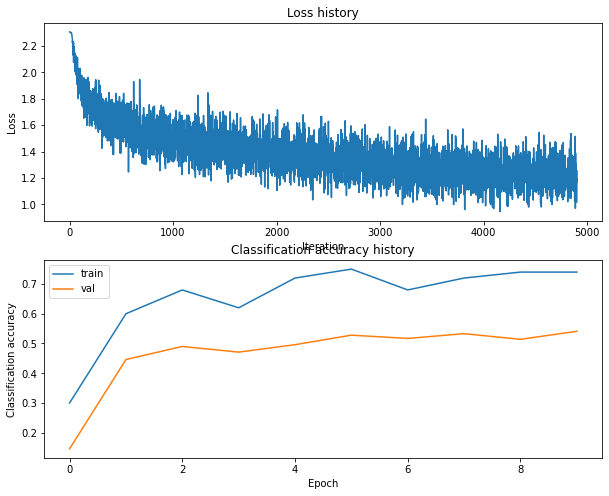

In [66]:
# output result
print('best val: %f' % best_val)
# print('best num iters {}'.format(best_ni))
print('best lr {}'.format(best_lr))
print('best hidden size {}'.format(best_hs))
print('best batch size {}'.format(best_bs))
print('best lr decay {}'.format(best_lr_decay))
print('best lr reg {}'.format(best_lr_reg))
plot_history(best_stats)

In [77]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.547


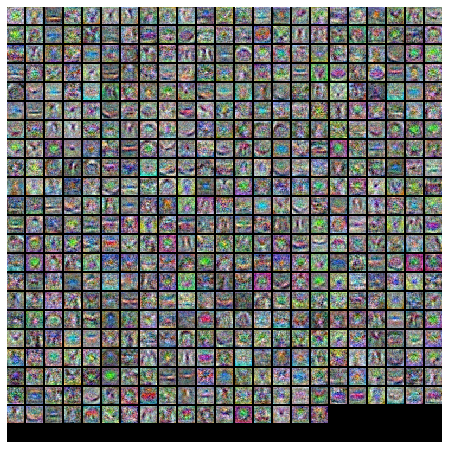

In [78]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [79]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.543


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$
1,2,3

$\color{blue}{\textit Your Explanation:}$
For 1, training on the large dataset would end up having better result because the net would adapt to more data. When the net meets the similar data, the result would be better. For 2, adding hidden units would improve the fitting ability, but adding to much hidden units may end up overfitting. For 3, increasing the regularization strength would push the net not to overfit and use the small or zero weight, which would improve the generalization ability.
